In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import nltk
import string
%matplotlib inline
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from imblearn.under_sampling import NearMiss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

In [2]:
tweets_df = pd.read_csv('bitcointweets.csv', header=None)
pd.set_option('display.max_colwidth', -1)
tweets_df = tweets_df[[1,7]]
tweets_df.columns = ['tweet','label']
tweets_df.head()

<ipython-input-2-25b99cc13e51>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,tweet,label
0,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I had to tweak the nose of this Bitcoin enemy. He says such foolish things. Here's the link: htt…",['neutral']
1,@lopp @_Kevin_Pham @psycho_sage @naval But @ProfFaustus (dum b a ss) said you know nothing about #Bitcoin ... 😂😂😂 https://t.co/SBAMFQ2Yiy,['neutral']
2,RT @tippereconomy: Another use case for #blockchain and #Tipper. The #TipperEconomy can unseat Facebook and change everything! ICO Live No…,['positive']
3,free coins https://t.co/DiuoePJdap,['positive']
4,RT @payvxofficial: WE are happy to announce that PayVX Presale Phase 1 is now LIVE!\n\nSign up --&gt;&gt; https://t.co/dhprzsSxek\nCurrencies accept…,['positive']


C:\ProgramData\Anaconda3\envs\research-test\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

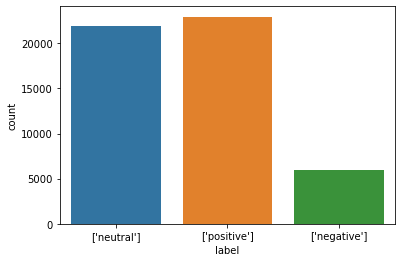

In [3]:
sns.countplot(tweets_df['label'])

In [4]:
def clean_text(df):
    all_reviews = list()
    lines = df["tweet"].values.tolist()
    for text in lines:
        text = re.sub(r'@[A-Za-z0-9]+','',text)
        text = re.sub(r'#','',text)
        text = re.sub(r'RT[\s]+','',text)
        text = text.lower()
        pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
        text = pattern.sub('', text)
        text = re.sub(r"[,.\"!@#$%^&*(){}?/;`~:<>+=-]", "", text)
        tokens = word_tokenize(text)
        table = str.maketrans('', '', string.punctuation)
        stripped = [w.translate(table) for w in tokens]
        words = [word for word in stripped if word.isalpha()]
        stop_words = set(stopwords.words("english"))
        stop_words.discard("not")
        PS = PorterStemmer()
#         words = [w for w in words if not w in stop_words]
        words = [PS.stem(w) for w in words if not w in stop_words]
        words = ' '.join(words)
        all_reviews.append(words)
    return all_reviews

In [5]:
all_tweets = clean_text(tweets_df)
all_tweets[0:20]

['paul krugman nobel luddit tweak nose bitcoin enemi say foolish thing link',
 'kevinpham sage dum b ss said know noth bitcoin',
 'anoth use case blockchain tipper tippereconomi unseat facebook chang everyth ico live',
 'free coin',
 'happi announc payvx presal phase live sign gtgt currenc',
 'copi success trader automat bitcoin copi',
 'reveal surpris tomorrow readi celebr us surpris present crypto bitcoin',
 'one click start mine cryptocurr togeth peopl bitcoin paa cloudnetwork',
 'first speaker get bitcoin greatest cash world medium exchang not',
 'bitcoin nt built live exchang',
 'buddi whatev seri diseas bannon clearli want bitcoin',
 'ice agenc charg payza two canadian citizen bitcoin money launder regul aml arrest bitcoin',
 'seen http protocol error page not found know develop protocol put',
 'patienc truli virtu',
 'bitcoinmonst bitcoin monster monster asset cryptocurr monster masternod support high reward',
 'break steverichfxcorp news alert live latest news updat',
 'month c

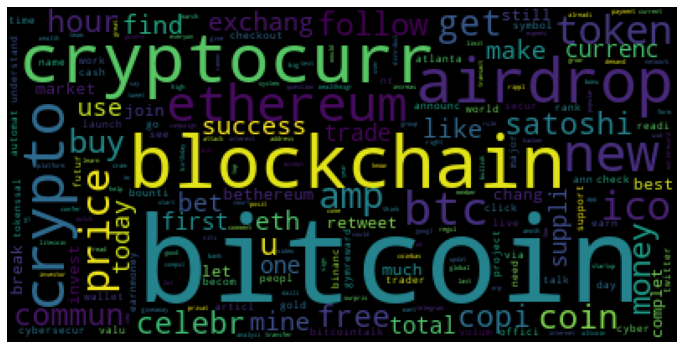

In [21]:
text = (" ").join(all_tweets)   
wordcloud = WordCloud(
    collocations=False,
    relative_scaling=0.5,
    stopwords=set(stopwords.words('english'))).generate(text)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [22]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
CV = CountVectorizer(max_features=2000,ngram_range=(1,3))   
X = CV.fit_transform(all_tweets).toarray()
y = tweets_df['label']
print(np.shape(X))
print(np.shape(y))

(50859, 2000)
(50859,)


In [24]:
nm = NearMiss()
X_nm,y_nm = nm.fit_sample(X,y)

In [25]:
sm = SMOTE(random_state = 2) 
X_sm,y_sm = sm.fit_sample(X, y); 

C:\ProgramData\Anaconda3\envs\research-test\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

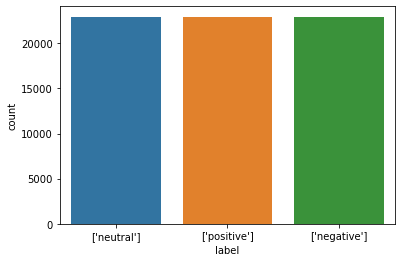

In [14]:
sns.countplot(y_res)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
linear_svc = LinearSVC()
linear_svc.fit(X_train,y_train)
y_pred = linear_svc.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

['negative']       0.92      0.74      0.82      1196
 ['neutral']       0.88      0.96      0.92      4333
['positive']       0.95      0.92      0.93      4643

    accuracy                           0.91     10172
   macro avg       0.91      0.87      0.89     10172
weighted avg       0.91      0.91      0.91     10172



In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=0)
linear_svc = LinearSVC()
linear_svc.fit(X_train,y_train)
y_pred = linear_svc.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

['negative']       0.87      0.94      0.90      4625
 ['neutral']       0.89      0.87      0.88      4568
['positive']       0.96      0.90      0.93      4570

    accuracy                           0.90     13763
   macro avg       0.91      0.90      0.90     13763
weighted avg       0.91      0.90      0.90     13763



In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
model_naive = MultinomialNB()
model_naive.fit(X_train,y_train)
y_pred = model_naive.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

['negative']       0.71      0.67      0.69      1196
 ['neutral']       0.82      0.86      0.84      4333
['positive']       0.87      0.84      0.85      4643

    accuracy                           0.83     10172
   macro avg       0.80      0.79      0.79     10172
weighted avg       0.83      0.83      0.83     10172



In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=0)
model_naive = MultinomialNB()
model_naive.fit(X_train,y_train)
y_pred = model_naive.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

['negative']       0.87      0.69      0.77      4625
 ['neutral']       0.70      0.86      0.77      4568
['positive']       0.85      0.83      0.84      4570

    accuracy                           0.79     13763
   macro avg       0.81      0.79      0.79     13763
weighted avg       0.81      0.79      0.79     13763



In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

['negative']       0.94      0.83      0.88      1196
 ['neutral']       0.93      0.97      0.95      4333
['positive']       0.97      0.95      0.96      4643

    accuracy                           0.95     10172
   macro avg       0.94      0.92      0.93     10172
weighted avg       0.95      0.95      0.95     10172



In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=0)
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

['negative']       0.92      0.97      0.94      4625
 ['neutral']       0.93      0.93      0.93      4568
['positive']       0.98      0.93      0.96      4570

    accuracy                           0.94     13763
   macro avg       0.94      0.94      0.94     13763
weighted avg       0.94      0.94      0.94     13763



In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1) 
dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

['negative']       0.88      0.86      0.87      1155
 ['neutral']       0.93      0.95      0.94      4388
['positive']       0.96      0.95      0.95      4629

    accuracy                           0.94     10172
   macro avg       0.92      0.92      0.92     10172
weighted avg       0.94      0.94      0.94     10172



In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=1) 
dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

['negative']       0.90      0.97      0.93      4521
 ['neutral']       0.93      0.90      0.92      4545
['positive']       0.97      0.93      0.95      4697

    accuracy                           0.93     13763
   macro avg       0.93      0.93      0.93     13763
weighted avg       0.93      0.93      0.93     13763



In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_nm, y_nm, test_size=0.2, random_state=1)
svm_svc = svm.SVC(kernel='rbf') 
svm_svc.fit(X_train, y_train)
y_pred = svm_svc.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

['negative']       0.94      0.85      0.89      1206
 ['neutral']       0.80      0.96      0.87      1191
['positive']       0.92      0.84      0.88      1193

    accuracy                           0.88      3590
   macro avg       0.89      0.88      0.88      3590
weighted avg       0.89      0.88      0.88      3590



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=1)
svm_svc = svm.SVC(kernel='rbf') 
svm_svc.fit(X_train, y_train)
y_pred = svm_svc.predict(X_test)
print(classification_report(y_test,y_pred))

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

['negative']       0.90      0.76      0.83      1155
 ['neutral']       0.82      0.97      0.89      4388
['positive']       0.97      0.84      0.90      4629

    accuracy                           0.88     10172
   macro avg       0.90      0.86      0.87     10172
weighted avg       0.90      0.88      0.88     10172



In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=1)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

['negative']       0.79      0.98      0.87      4521
 ['neutral']       0.88      0.83      0.86      4545
['positive']       0.98      0.80      0.88      4697

    accuracy                           0.87     13763
   macro avg       0.88      0.87      0.87     13763
weighted avg       0.88      0.87      0.87     13763



In [20]:
print('ROCAUC score:',roc_auc_score(y_test,y_pred))

ValueError: could not convert string to float: "['neutral']"

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=0)
model_naive = MultinomialNB()
model_naive.fit(X_train,y_train)
y_pred = model_naive.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

['negative']       0.87      0.69      0.77      4625
 ['neutral']       0.70      0.86      0.77      4568
['positive']       0.85      0.83      0.84      4570

    accuracy                           0.79     13763
   macro avg       0.81      0.79      0.79     13763
weighted avg       0.81      0.79      0.79     13763



In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

['negative']       0.94      0.84      0.89      1196
 ['neutral']       0.93      0.97      0.95      4333
['positive']       0.97      0.95      0.96      4643

    accuracy                           0.95     10172
   macro avg       0.94      0.92      0.93     10172
weighted avg       0.95      0.95      0.95     10172



In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1) 
dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

['negative']       0.88      0.85      0.87      1155
 ['neutral']       0.93      0.95      0.94      4388
['positive']       0.96      0.95      0.95      4629

    accuracy                           0.94     10172
   macro avg       0.92      0.92      0.92     10172
weighted avg       0.94      0.94      0.94     10172



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=1)
svm_svc = svm.SVC(kernel='rbf') # Linear Kernel
svm_svc.fit(X_train, y_train)
y_pred = svm_svc.predict(X_test)
print(classification_report(y_test,y_pred))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=1)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test,y_pred))